# Understanding violence against women

This notebook analyzes survey data on attitudes toward violence against women. The dataset includes responses from various countries, categorized by demographic factors.


## Table of contents

- [1. Importing libraries](#1.-Importing-libraries)
- [2. Loading and understanding the dataset](#2.-Loading-and-understanding-the-dataset)
- [3. Data transformation](#3.-Data-transformation)
- [4. Analysis](#4.-Analysis)
- [5. Outliers inspection](#5.-Outliers-inspection)
- [6. Statistical analysis](#6.-Statistical-analysis)

## 1. Importing libraries
---

In [115]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal

[Back to table of contents](#Table-of-contents)

## 2. Loading and understanding the dataset
---

In [47]:
df = pd.read_csv("violence_data.csv")
df.head(100)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
95,351,Afghanistan,F,Residence,Rural,... for at least one specific reason,01/01/2015,82.1
96,351,Afghanistan,F,Residence,Urban,... for at least one specific reason,01/01/2015,74.0
97,71,Afghanistan,F,Residence,Rural,... if she argues with him,01/01/2015,60.6
98,71,Afghanistan,F,Residence,Urban,... if she argues with him,01/01/2015,54.7


### Dataset shape and features 

In [48]:
df.shape

(12600, 8)

The dataset contains 12,600 records and 8 columns, with the target variable being "Value," which represents the percentage of people surveyed in a specific demographic group who agree with a given justification for violence against women. The features include demographic information such as country, gender, marital status, education level, employment status, residence type, and age.

Here is a document containing the list and description of all the features present in our database: [Data description](/data_description.pdf).**store in drive**

### Checking for missing values

Let's get a list of all the features. We also want to find out those that have missing values and the data type of each column.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


The dataset has missing values in the `Value` column. Could this indicate that no respondents in a particular demographic group agreed with the justification?

To help us confirm this, let's first look at descriptive statistsics.

### Descriptive statistics

In [50]:
df["Value"].describe()

count    11187.000000
mean        19.762537
std         16.986437
min          0.000000
25%          6.200000
50%         14.900000
75%         29.200000
max         86.900000
Name: Value, dtype: float64

From the descriptive statistics, the minimum value in the `Value` column is `0`. This means that if no one in a certain demographic group agreed to the given reason, a value of `0` was given. Hence, null values from earlier are just a case of missing values. 

To better understand the missing values, I created a function, `filter_nulls_by_country`, to filter rows with missing `Value` entries for a specific country. 

In [51]:
# Define the function to filter for rows with missing values for a given country.
def filter_nulls_by_country(dataframe, country):
    
    nulls_df = dataframe[(dataframe['Value'].isnull()) & (dataframe['Country'] == country)]
    
    return nulls_df

In [52]:
filter_nulls_by_country(df, 'Yemen')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
12150,418,Yemen,M,Age,15-24,... for at least one specific reason,01/01/2013,NaN
12151,418,Yemen,M,Age,25-34,... for at least one specific reason,01/01/2013,NaN
12152,418,Yemen,M,Age,35-49,... for at least one specific reason,01/01/2013,NaN
12153,138,Yemen,M,Age,15-24,... if she argues with him,01/01/2013,NaN
12154,138,Yemen,M,Age,25-34,... if she argues with him,01/01/2013,NaN
...,...,...,...,...,...,...,...,...
12235,208,Yemen,M,Residence,Urban,... if she goes out without telling him,01/01/2013,NaN
12236,278,Yemen,M,Residence,Rural,... if she neglects the children,01/01/2013,NaN
12237,278,Yemen,M,Residence,Urban,... if she neglects the children,01/01/2013,NaN
12238,348,Yemen,M,Residence,Rural,... if she refuses to have sex with him,01/01/2013,NaN


Missing values are not random but follow specific patterns, such as being tied to certain years or demographic responses. 

For example, when applied to `Yemen`, the function revealed that missing values were present in specific years and demographic groups, such as those employed `for kind` in `2013`.

**there are certain factors that might have led to this....**

**I chose to leave them as NaN for now, as they provide meaningful information about the dataset. because will be treated as numeric…proceed with analysis as is for now**



### Distribution of the target variable

The descriptive statistics above show that the `Value` column ranges from `0 to 86.9`, with `75%` of the data falling between `0 and 29.2`. This suggests variation in the responses, with some demographic groups showing much higher agreement rates than others.

To get a better understanding, let's look at the distribution of our target variable:

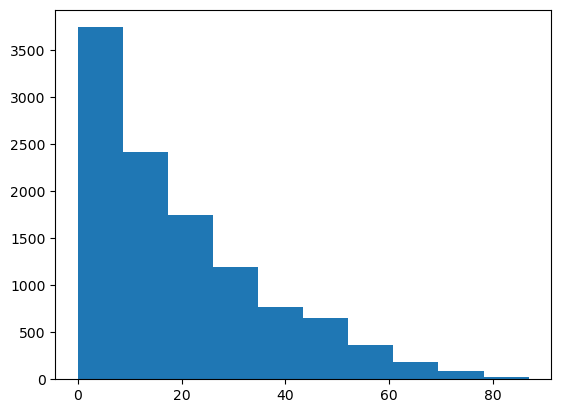

In [53]:
plt.hist(df["Value"]);

A histogram of the `Value` column revealed a right-skewed distribution, indicating the presence of outliers. These outliers represent demographic groups with unusually high agreement rates, which could be worth investigating further.

**Thought process:

The skewness suggests that while most groups have low agreement rates, a few groups stand out with significantly higher rates.

Next steps: Investigate the demographic characteristics of these outliers to understand what factors might contribute to higher agreement rates.**

### Removing duplicates

In [54]:
df = df.drop_duplicates()
df.shape

(12600, 8)

The shape remains the same indicating that there were no duplicates in our dataset

### Checking for cardinality in the categorical columns

In [55]:
df.select_dtypes(include="object").nunique()

Country                  70
Gender                    2
Demographics Question     5
Demographics Response    15
Question                  6
Survey Year              18
dtype: int64

We have a whooping 70 countries represented in our dataset. It also seems our data spans 18 years.

Let's have a look at which countries these are:

In [56]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

[Back to table of contents](#Table-of-contents)

## 3. Data transformation
---

### Reducing the Dataset to African Countries

The data spans various countries, from various continents. To focus the analysis, I filtered the dataset to include only African countries.

In [57]:
# List of African countries
african_countries = [
    'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad',
    'Comoros', 'Congo', 'Congo Democratic Republic', "Cote d'Ivoire", 
    'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 
    'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
    'Malawi', 'Mali', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 
    'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda', 
    'Zambia', 'Zimbabwe'
]

# Filter for records related to African countries
df_africa = df[df['Country'].isin(african_countries)].reset_index(drop=True)

In [58]:
df_africa.head(10)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,3,Angola,F,Education,Higher,... if she burns the food,01/01/2015,0.9
1,3,Angola,F,Education,Secondary,... if she burns the food,01/01/2015,5.3
2,3,Angola,F,Residence,Urban,... if she burns the food,01/01/2015,6.9
3,3,Angola,F,Employment,Unemployed,... if she burns the food,01/01/2015,8.8
4,3,Angola,F,Marital status,Never married,... if she burns the food,01/01/2015,9.8
5,3,Angola,F,Employment,Employed for cash,... if she burns the food,01/01/2015,9.9
6,3,Angola,F,Age,25-34,... if she burns the food,01/01/2015,10.0
7,3,Angola,F,Age,15-24,... if she burns the food,01/01/2015,10.6
8,3,Angola,F,Marital status,Married or living together,... if she burns the food,01/01/2015,10.8
9,3,Angola,F,Age,35-49,... if she burns the food,01/01/2015,11.0


#### Dataset shape and features

In [59]:
print("No. of countries:", df_africa["Country"].nunique())
print("Dataset shape:", df_africa.shape)
print(df_africa.info())

No. of countries: 39
Dataset shape: (7020, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7020 entries, 0 to 7019
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               7020 non-null   int64  
 1   Country                7020 non-null   object 
 2   Gender                 7020 non-null   object 
 3   Demographics Question  7020 non-null   object 
 4   Demographics Response  7020 non-null   object 
 5   Question               7020 non-null   object 
 6   Survey Year            7020 non-null   object 
 7   Value                  6672 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 438.9+ KB
None


This reduced the dataset to `7,020` records spanning `39` countries. The filtered dataset retains the same structure but is more manageable for regional analysis.

All data types are fitting except for the `Survey Year` column. It's of the object type, but we expect it to be numeric. We shall handle this later.

#### Checking for missing values

I also note that missing values have persisted even in our reduced dataset, about 350. Let's investigate whether there is a patterrn just like we did with the larger dataset, using the same function:

In [60]:
filter_nulls_by_country(df_africa, 'South Africa')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6073,409,South Africa,M,Employment,Employed for kind,... for at least one specific reason,01/01/2016,NaN
6076,129,South Africa,M,Employment,Employed for kind,... if she argues with him,01/01/2016,NaN
6079,59,South Africa,M,Employment,Employed for kind,... if she burns the food,01/01/2016,NaN
6082,199,South Africa,M,Employment,Employed for kind,... if she goes out without telling him,01/01/2016,NaN
6085,269,South Africa,M,Employment,Employed for kind,... if she neglects the children,01/01/2016,NaN
6088,339,South Africa,M,Employment,Employed for kind,... if she refuses to have sex with him,01/01/2016,NaN


I observe that missing values are tied to certain years and demographic responses.

For example, when applied to `South Africa`, the function revealed that missing values were present in those `employed for kind` in `2016`.

**there are certain factors that might have led to this....
leave as Nan because will be treated as numeric…proceed with analysis as is for now**

In [61]:
df_africa["Value"].describe()

count    6672.000000
mean       22.347662
std        16.534109
min         0.000000
25%         8.900000
50%        18.600000
75%        32.100000
max        86.100000
Name: Value, dtype: float64

#### Descriptive statistics

The descriptive statistics follow a similar pattern as the larger dataset by revealing variation in the responses and some demographic groups showing much higher agreement rates than others. The `Value` column ranges from `0 and 86.1`, with `75%` of the data falling between `0 and 32.1`. This suggests 

#### Distribution of the target variable

To get a better understanding, let's look at the distribution of the target variable.

(array([1598., 1532., 1237.,  844.,  562.,  459.,  243.,  117.,   64.,
          16.]),
 array([ 0.  ,  8.61, 17.22, 25.83, 34.44, 43.05, 51.66, 60.27, 68.88,
        77.49, 86.1 ]),
 <BarContainer object of 10 artists>)

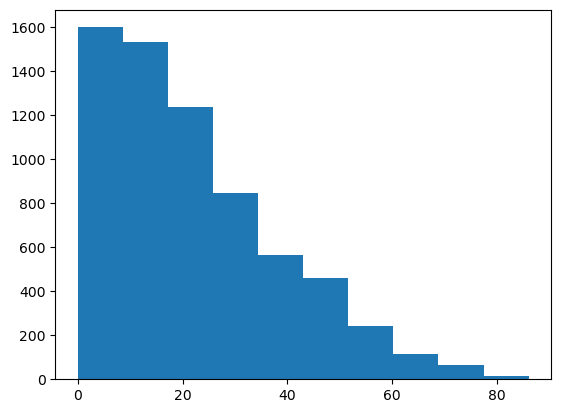

In [62]:
plt.hist(df_africa["Value"])

Once again, a histogram of the `Value` column reveals a right-skewed distribution, indicating the presence of outliers. These outliers represent demographic groups whose agreement rates seem to be way higher than others.

**Our African dataset seems to follow the same trend/shape as the larger dataset. Curious about the rest of the continents>**

#### Checking for cardinality in the categorical columns

In [63]:
df_africa.select_dtypes(include="object").nunique()

Country                  39
Gender                    2
Demographics Question     5
Demographics Response    15
Question                  6
Survey Year              13
dtype: int64

While the rest of the features remain the same as before, the reduced dataset spans only `13` years.

### Transforming the `Survey Year` column

We have 13 unique year readings, does this mean our data spans 13 years, or do we have some years that have different dates? 

Let's check:

In [64]:
df_africa["Survey Year"].unique()

array(['01/01/2015', '01/01/2017', '01/01/2010', '01/01/2016',
       '01/01/2011', '01/01/2014', '01/01/2012', '01/01/2013',
       '01/01/2002', '01/01/2006', '01/01/2018', '01/01/2008',
       '01/01/2003'], dtype=object)

It seems our data spans between `2002` and `2018`, with some years missing inbetween. With the date and month reading the same for all values, it is not neccessary keep that part. I will therefore **truncate the date** to be left with the year alone. I will then **convert it to numeric format** as we had mentioned earlier. 

In [65]:
# Convert "Survey Year" to datetime and extract the year
df_africa["Year"] = pd.to_datetime(df_africa["Survey Year"]).dt.year

In [66]:
df_africa.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Year
0,3,Angola,F,Education,Higher,... if she burns the food,01/01/2015,0.9,2015
1,3,Angola,F,Education,Secondary,... if she burns the food,01/01/2015,5.3,2015
2,3,Angola,F,Residence,Urban,... if she burns the food,01/01/2015,6.9,2015
3,3,Angola,F,Employment,Unemployed,... if she burns the food,01/01/2015,8.8,2015
4,3,Angola,F,Marital status,Never married,... if she burns the food,01/01/2015,9.8,2015


I also observe that there are no different `country+year` readings, as was my initial assumption. Each **country has one year value**, meaning a survey for a country was carried out in a particular year only. 

This means we cannot we **cannot track changes over time** for individual countries. I do not observe common factors among countries whose surveys were conducted in the same year. For example, assuming that in a partcular year, they focused on countries in a particular region.

In [67]:
df_africa[df_africa["Year"]==2016]["Country"].unique()

array(['Burundi', 'Ethiopia', 'South Africa', 'Uganda'], dtype=object)

Although this column does not seem credible to give us any time analysis, we can keep it to give context on when a particular survey was carried out.

### Adding a `Region` Column

To enable regional analysis, I added a `Region` column that classifies each country into one of five African regions: `North Africa`, `West Africa`, `East Africa`, `Central Africa`, and `Southern Africa`. 

This will be useful for **broader analysis**, allowing us to explore and compare patterns across different parts of Africa and discover regional disparities or trends.

In [68]:
# Define the mapping of countries to regions
region_mapping = {
    # North Africa
    "Egypt": "North Africa",
    "Morocco": "North Africa",
    
    # West Africa
    "Benin": "West Africa",
    "Burkina Faso": "West Africa",
    "Cote d'Ivoire": "West Africa",
    "Gambia": "West Africa",
    "Ghana": "West Africa",
    "Guinea": "West Africa",
    "Liberia": "West Africa",
    "Mali": "West Africa",
    "Niger": "West Africa",
    "Nigeria": "West Africa",
    "Senegal": "West Africa",
    "Sierra Leone": "West Africa",
    "Togo": "West Africa",
    
    # East Africa
    "Burundi": "East Africa",
    "Comoros": "East Africa",
    "Eritrea": "East Africa",
    "Ethiopia": "East Africa",
    "Kenya": "East Africa",
    "Rwanda": "East Africa",
    "Tanzania": "East Africa",
    "Uganda": "East Africa",
    "Madagascar": "East Africa",
    
    # Central Africa
    "Angola": "Central Africa",
    "Cameroon": "Central Africa",
    "Chad": "Central Africa",
    "Congo": "Central Africa",
    "Congo Democratic Republic": "Central Africa",
    "Gabon": "Central Africa",
    "Sao Tome and Principe": "Central Africa",
    
    # Southern Africa
    "Eswatini": "Southern Africa",
    "Lesotho": "Southern Africa",
    "Malawi": "Southern Africa",
    "Mozambique": "Southern Africa",
    "Namibia": "Southern Africa",
    "South Africa": "Southern Africa",
    "Zambia": "Southern Africa",
    "Zimbabwe": "Southern Africa"
}

# Add the "Region" column to the DataFrame
df_africa["Region"] = df_africa["Country"].map(region_mapping)# Define the mapping of countries to regions

In [69]:
df_africa.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Year,Region
0,3,Angola,F,Education,Higher,... if she burns the food,01/01/2015,0.9,2015,Central Africa
1,3,Angola,F,Education,Secondary,... if she burns the food,01/01/2015,5.3,2015,Central Africa
2,3,Angola,F,Residence,Urban,... if she burns the food,01/01/2015,6.9,2015,Central Africa
3,3,Angola,F,Employment,Unemployed,... if she burns the food,01/01/2015,8.8,2015,Central Africa
4,3,Angola,F,Marital status,Never married,... if she burns the food,01/01/2015,9.8,2015,Central Africa


### Reordering and dropping unneccessary columns

I no longer need the `Survey Year` column, so I'll drop it.
I will also reorder the columns to place the target variable `Value` at the end to improve readability.

In [70]:
# Drop the "Survey Year" column
df_africa = df_africa.drop(columns=["Survey Year"])

# Reorder columns to place the target column at the end
# Explicit column order
column_order = [
    "RecordID",  
    "Country",
    "Region",
    "Year",
    "Gender",
    "Demographics Question",
    "Demographics Response",
    "Question",
    "Value"
]

# Reorder the DataFrame
df_africa = df_africa[column_order]

In [71]:
df_africa.head()

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
0,3,Angola,Central Africa,2015,F,Education,Higher,... if she burns the food,0.9
1,3,Angola,Central Africa,2015,F,Education,Secondary,... if she burns the food,5.3
2,3,Angola,Central Africa,2015,F,Residence,Urban,... if she burns the food,6.9
3,3,Angola,Central Africa,2015,F,Employment,Unemployed,... if she burns the food,8.8
4,3,Angola,Central Africa,2015,F,Marital status,Never married,... if she burns the food,9.8


### Confirming datatypes and saving transformed dataset

After confirming that all the columns are of the **correct datatype**, I **save the cleaned dataset** as a new CSV file for future use.

This allows for reproducibility and avoids the need to repeat preprocessing steps.

In [72]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7020 entries, 0 to 7019
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               7020 non-null   int64  
 1   Country                7020 non-null   object 
 2   Region                 7020 non-null   object 
 3   Year                   7020 non-null   int32  
 4   Gender                 7020 non-null   object 
 5   Demographics Question  7020 non-null   object 
 6   Demographics Response  7020 non-null   object 
 7   Question               7020 non-null   object 
 8   Value                  6672 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 466.3+ KB


In [73]:
# Save to a CSV file
df_africa.to_csv("Africa_dataset.csv", index=False)

In [74]:
# Load dataset
df_africa = pd.read_csv("Africa_dataset.csv")

In [75]:
df_africa.head(20)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
0,3,Angola,Central Africa,2015,F,Education,Higher,... if she burns the food,0.9
1,3,Angola,Central Africa,2015,F,Education,Secondary,... if she burns the food,5.3
2,3,Angola,Central Africa,2015,F,Residence,Urban,... if she burns the food,6.9
3,3,Angola,Central Africa,2015,F,Employment,Unemployed,... if she burns the food,8.8
4,3,Angola,Central Africa,2015,F,Marital status,Never married,... if she burns the food,9.8
5,3,Angola,Central Africa,2015,F,Employment,Employed for cash,... if she burns the food,9.9
6,3,Angola,Central Africa,2015,F,Age,25-34,... if she burns the food,10.0
7,3,Angola,Central Africa,2015,F,Age,15-24,... if she burns the food,10.6
8,3,Angola,Central Africa,2015,F,Marital status,Married or living together,... if she burns the food,10.8
9,3,Angola,Central Africa,2015,F,Age,35-49,... if she burns the food,11.0


### Seperate the dataset into different demographic groupings

We are provided with group level statistics- 
The target value in my dataset is % of people surveyed in the relevant group who agree with the question (e.g. the percentage of women aged 15-24 in Afghanistan who agree that a husband is justified in hitting or beating his wife if she burns the food). We have the demographic question which Refers to the different types of demographic groupings used to segment respondents – marital status, education level, employment status, residence type, or age. My thinking is that we can only compare these demographic categories seperately as this structure does not allow us to analyse combined demographics due to the values in each being aggregations.

Splitting the Dataset by Demographic Categories
The dataset includes five demographic categories: marital status, education level, employment status, residence type, and age. To facilitate focused analysis, I split the dataset into separate CSV files for each demographic category.

Why split the dataset?

Each demographic category represents a distinct dimension of the data, and analyzing them separately can provide deeper insights.

Example: Analyzing the "Age" dataset separately allows us to understand how agreement rates vary across different age groups without the noise of other demographic factors.

In [76]:
# List of unique demographic categories
demographic_categories = df_africa["Demographics Question"].unique()

# Loop through each category and create a separate dataset
for category in demographic_categories:
    # Filter the main DataFrame for the current category
    demographic_dataset = df_africa[df_africa["Demographics Question"] == category].drop(columns=['Demographics Question'])

    # Save to a CSV file
    demographic_dataset.to_csv(f"{category.replace(' ', '_')}_dataset.csv", index=False)

Note, I have dropped the `Demographics Question` column for the demographic datasets since it holds the same value and does not add new information.

We have created datasets for each demographic and stored each in a seperate CSV file which we can now import in a notebook or visualization software. This allows us to perform separate analyses for each demographic grouping as required by the dataset structure.

In [77]:
df_age=pd.read_csv("Age_dataset.csv")
df_age.head()

,RecordID,Country,Region,Year,Gender,Demographics Response,Question,Value
0,3,Angola,Central Africa,2015,F,25-34,... if she burns the food,10.0
1,3,Angola,Central Africa,2015,F,15-24,... if she burns the food,10.6
2,3,Angola,Central Africa,2015,F,35-49,... if she burns the food,11.0
3,3,Angola,Central Africa,2015,M,35-49,... if she burns the food,3.7
4,3,Angola,Central Africa,2015,M,25-34,... if she burns the food,5.3


[Back to table of contents](#Table-of-contents)


## 4. Analysis
---

### Graphical analysis

Note, I will use median as the central tendancy value since our values are skewed, to avoid influence of outliers.

to reduce redundancy, I will use the following functions to plot barplots and boxplots respectively:

In [78]:
def barplot(X, Y, dataset, group):
    median = dataset.groupby(group)['Value'].median().sort_values(ascending=False).reset_index()
    sns.barplot(x=X, y=Y, data=median)

In [79]:
def boxplot(X, Y, dataset, group):
    plot = sns.boxplot(x=X, y=Y, data=dataset, order=dataset.groupby(group)["Value"].median().sort_values(ascending=False).index)
    return plot

#### Male vs Female: Who agrees with DV more?

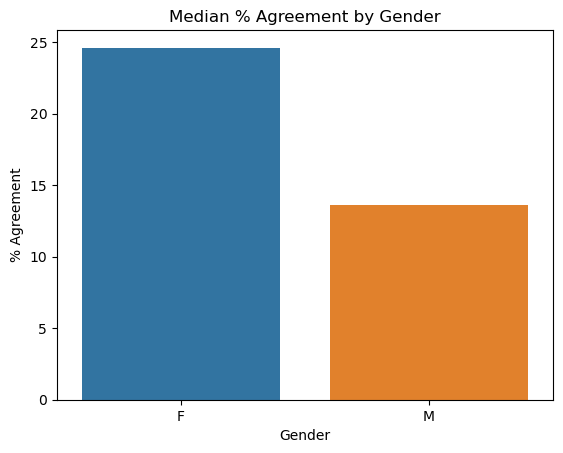

In [80]:
# Calculate median 'Value' by gender and create a bar plot
barplot('Gender', 'Value', df_africa, 'Gender')
plt.title('Median % Agreement by Gender')
plt.xlabel('Gender')
plt.ylabel('% Agreement')
plt.show()

The bar plot indicates that females show a higher median percentage of agreement that violence against women is justified compared to males. 

This is contrary to common expectations and suggests how nuanced cultural and social influences can be when it comes to affecting women's attitudes toward GBV.

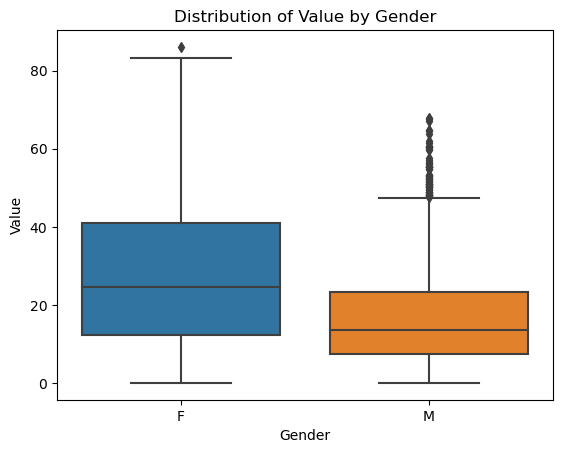

In [81]:
# Create a box plot for Value by Gender
boxplot('Gender', 'Value', df_africa, 'Gender')
plt.title('Distribution of Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.show()

The wider interquartile range in the box plot for females suggests not only higher central agreement but also greater variability among females in their responses.

For the males, the box plot highlights a significant presence of outliers. This indicates that while the median agreement with justifications for GBV among males may be lower, they hold polarized views, where some individuals strongly support GBV.

**We will conduct further exploration to understand these outliers.**

___

#### How do African regions rank when it comes to justifying DV?

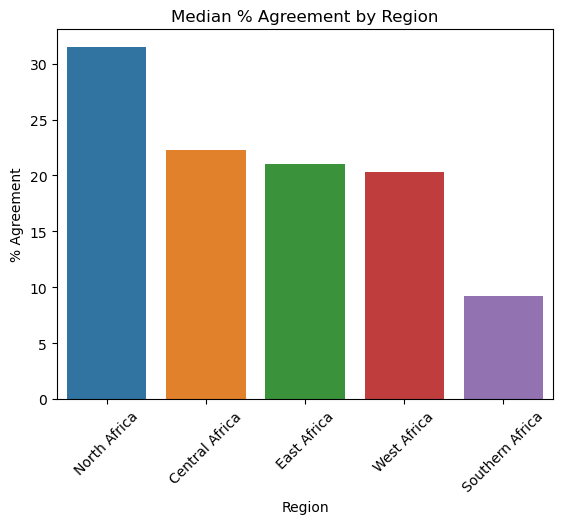

In [82]:
# Calculate median 'Value' by region and create a bar plot
barplot('Region', 'Value', df_africa, 'Region')
plt.title('Median % Agreement by Region')
plt.xticks(rotation=45)  # Rotates the region names for better readability
plt.xlabel('Region')
plt.ylabel('% Agreement')
plt.show()

`North Africa` shows the highest median agreement with justifications for gender-based violence (GBV), while `Southern Africa` shows the lowest. `Central Africa`, `East Africa`, and `West Africa` show moderate to high levels of agreement, indicating a prevalent acceptance of GBV in these regions as well.

This regional variations in attitudes toward GBV might suggest influences by cultural, economic, religious and legal factors specific to each region.

I will also plot a box plot to help me understand not just the central tendencies but also the variability and presence of outliers within each category, providing a comprehensive view of how responses differ across groups.

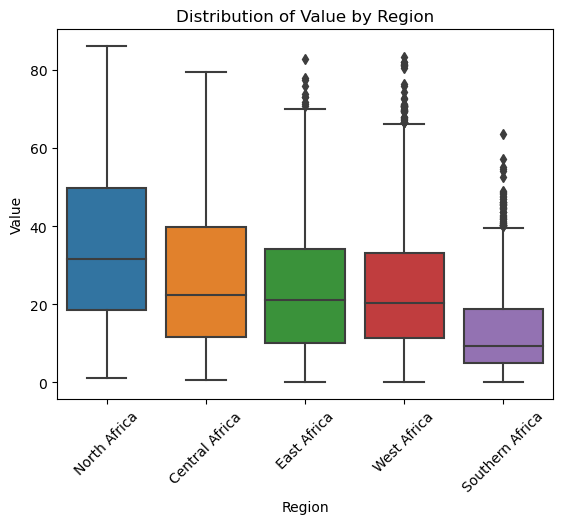

In [83]:
# Create a box plot for Value by Region
boxplot('Region', 'Value', df_africa, 'Region')
plt.title('Distribution of Value by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotates the labels for better readability
plt.show()

While we can see variability in the `North` and `Central` `Africa`'s responses, there are no outliers, indicating a high, yet more uniform opinion on GBV across this region.

With less variability and high outliers, `East` and `West Africa` show that there are extreme views endorsing GBV among certain respondents.

`Southern africa` shows the least variability suggesting a potential  consensus against GBV in that region.
___

#### Which reasons do africans find justifiable for DV?

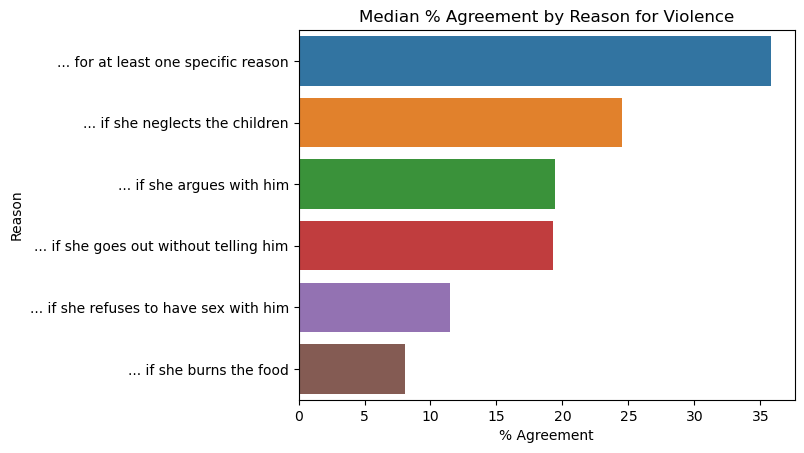

In [84]:
# 'Reason' is stored in the 'Question' column
barplot('Value', 'Question', df_africa, 'Question')
plt.title('Median % Agreement by Reason for Violence')
plt.xlabel('% Agreement')
plt.ylabel('Reason')
plt.show()

With the highest median percentage of agreement among all reasons,`Neglecting the Children` seems to be the most widely accepted justification for GBV which shows emphasis on the primary role of women as caregivers.

Other reasons that hold a significant level of median agreement are `Going Out Without Telling Him` and `Arguing with Him`. **This shows a strong cultural or societal expectation regarding women’s autonomy and communication- and submitting to a man' authority (the authority that men an regarded with in marriage- authoritative, submissive that men ans woen assume in a marriage setting.**

While `Refusing to Have Sex with Him` has a lower median agreement compared to the top reasons, it is still noticeable, indicating ongoing issues with consent and marital rights.

`Burning the Food` is seen to be the least justifiable reason for GBV compared to others.

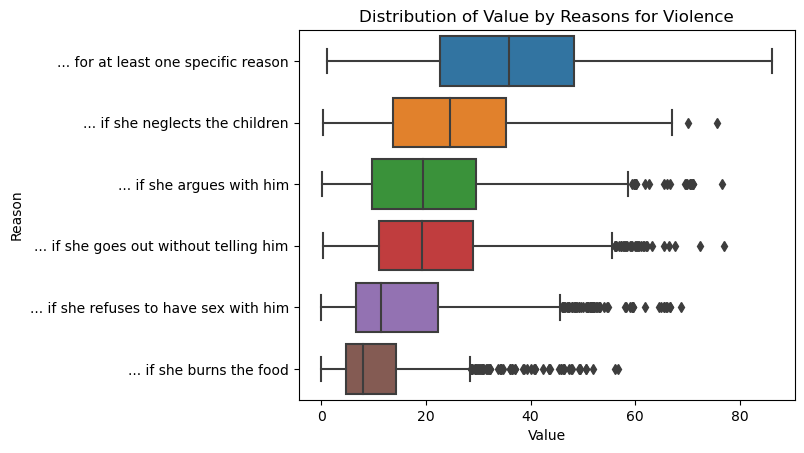

In [85]:
# Create a box plot for Value by Reason
boxplot('Value', 'Question', df_africa, 'Question')
plt.title('Distribution of Value by Reasons for Violence')
plt.xlabel('Value')
plt.ylabel('Reason')
plt.show()

All reasons show a range of agreement values, and the presence of outliers which indicates that some individuals hold strong beliefs that justify GBV based on these reasons.
___

#### How do the following demographics impact agreement to domestic violence in Africa?

#### a) Age

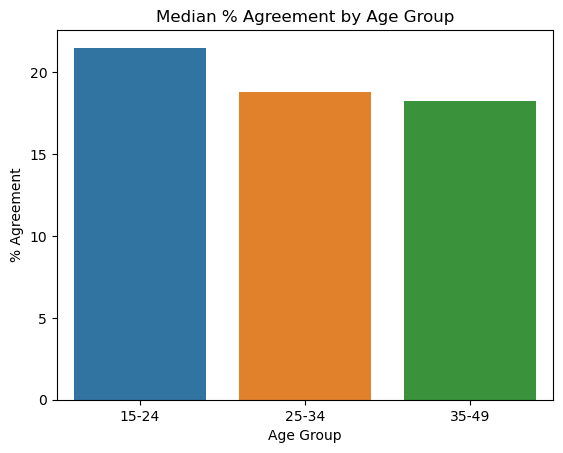

In [86]:
#load_dataset
df_age = pd.read_csv("Age_dataset.csv")

# Bar plot for median value by age group
barplot('Demographics Response', 'Value', df_age, 'Demographics Response')
plt.title('Median % Agreement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('% Agreement')
plt.show()

The median agreement is highest among the youngest age group, `15-24`. This could suggest that younger individuals may be more influenced by certain cultural norms or peer pressures that justify GBV.

The median agreement level then moderately decreases as we move to the older age groups. This could be due to changes in personal, social, or economic circumstances that influence perceptions on gender norms over time and age.

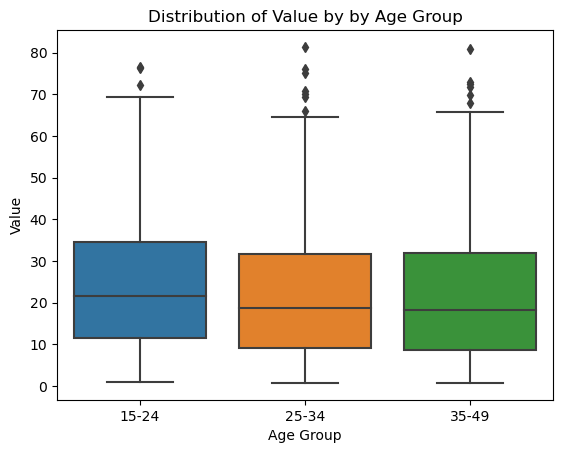

In [87]:
# Box plot for Value distribution by age group
boxplot('Demographics Response', 'Value', df_age, "Demographics Response")
plt.title('Distribution of Value by by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.show()

The box plot shows moderate and similar spread among all the age groups.
However, outliers are seen to become more with age, suggesting that deep rooted beliefs supporting GBV can persist or even strengthen with age in some individuals.

#### b) Education

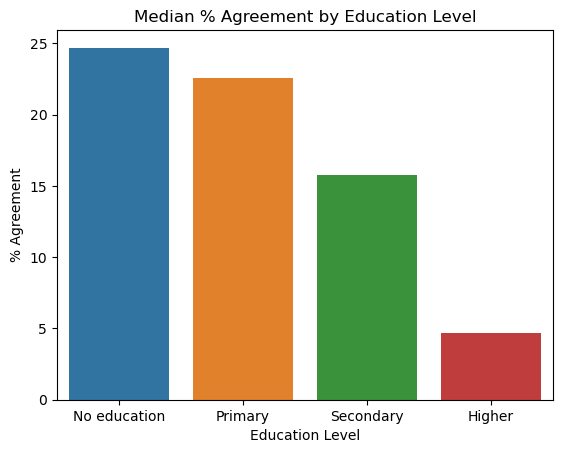

In [88]:
# Load_dataset
df_education = pd.read_csv("Education_dataset.csv")

# Bar plot for median Value by education level
barplot('Demographics Response', 'Value', df_education, 'Demographics Response')
plt.title('Median % Agreement by Education Level')
plt.xlabel('Education Level')
plt.ylabel('% Agreement')
plt.show()

The highest median agreement with justifications for GBV is observed in the lowest education level, No education, and continues to decrease as the education level goes higher.

This significant difference in the agreement levels between the lowest and highest education level shows that as individuals becomes more educated, they become exposed to views and opinions that challenge their agreement with GBV.

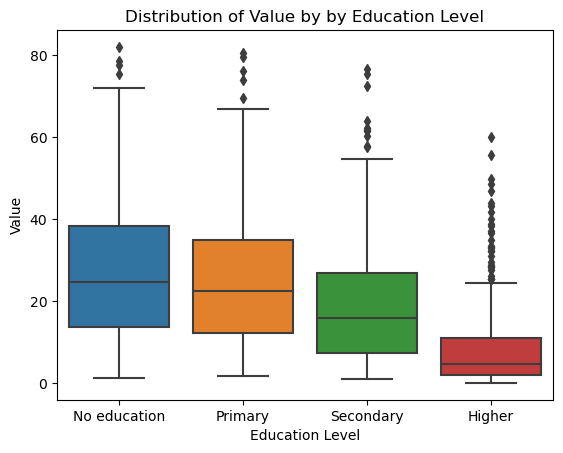

In [89]:
# Bar plot for median Value by education level
boxplot('Demographics Response', 'Value', df_education, "Demographics Response")
plt.title('Distribution of Value by by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Value')
plt.show()

With lower medians and less spread as the education level goes higher, it shows that as people become more educated, they share a more uniform opinion against GBV.

Although, we see that Higher education has a significant number of outliers, which suggests that while higher education generally leads to less acceptance of GBV, extreme views can still persist among some highly educated individuals.

#### c) Residence

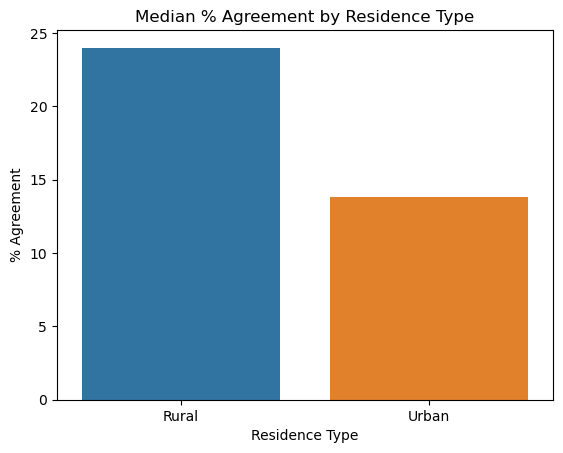

In [90]:
# Load_dataset
df_residence = pd.read_csv("Residence_dataset.csv")

# Bar plot for median Value by residence type
barplot('Demographics Response', 'Value', df_residence, 'Demographics Response')
plt.title('Median % Agreement by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('% Agreement')
plt.show()

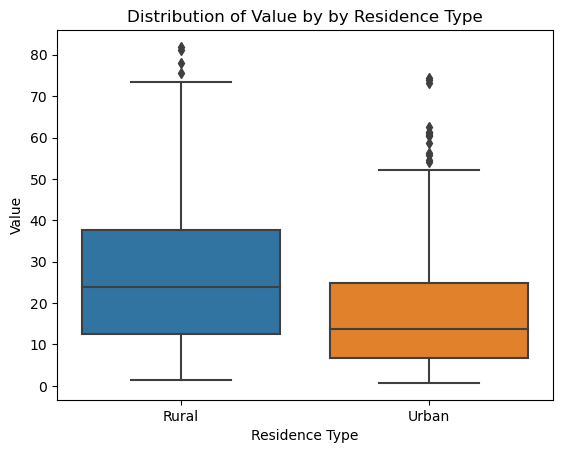

In [91]:
# Bar plot for median Value by residence type
boxplot('Demographics Response', 'Value', df_residence, "Demographics Response")
plt.title('Distribution of Value by by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Value')
plt.show()

#### d) Employment

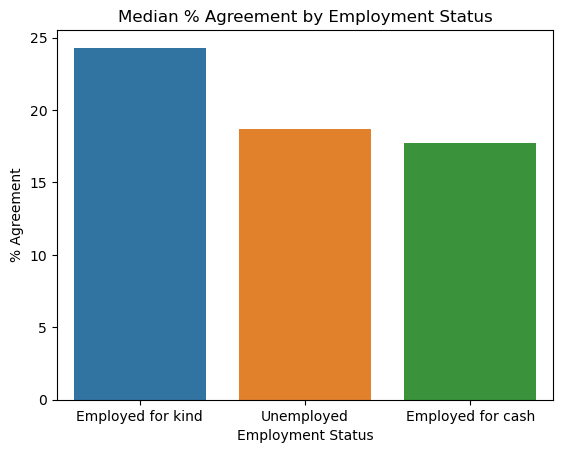

In [92]:
#load_dataset
df_employment = pd.read_csv("Employment_dataset.csv")

# Bar plot for median Value by employment status
barplot('Demographics Response', 'Value', df_employment, 'Demographics Response')
plt.title('Median % Agreement by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('% Agreement')
plt.show()

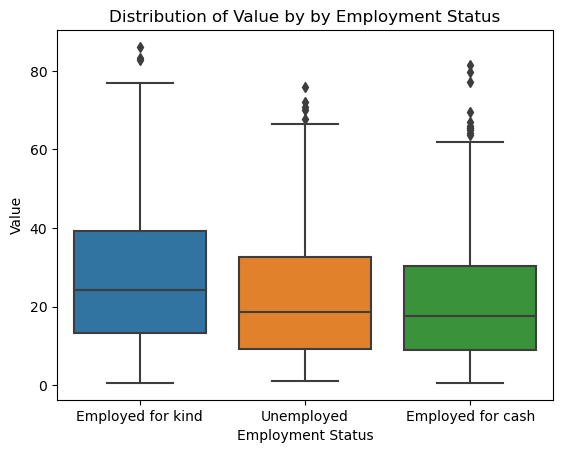

In [93]:
# Bar plot for median Value by employment status
boxplot('Demographics Response', 'Value', df_employment, "Demographics Response")
plt.title('Distribution of Value by by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Value')
plt.show()

#### e) Marital Status

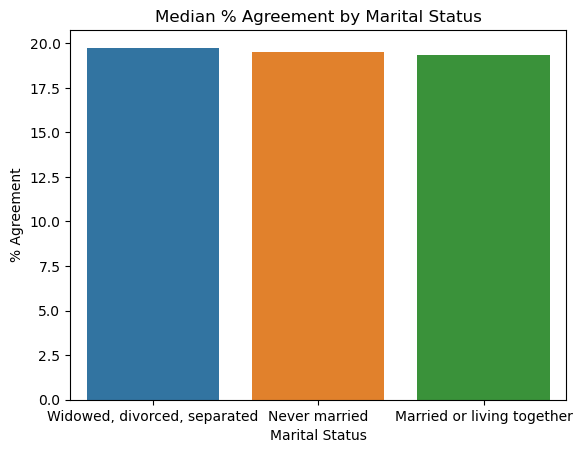

In [94]:
#load_dataset
df_marital = pd.read_csv("Marital_Status_dataset.csv")

# Bar plot for median Value by marital status
barplot('Demographics Response', 'Value', df_marital, 'Demographics Response')
plt.title('Median % Agreement by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('% Agreement')
plt.show()

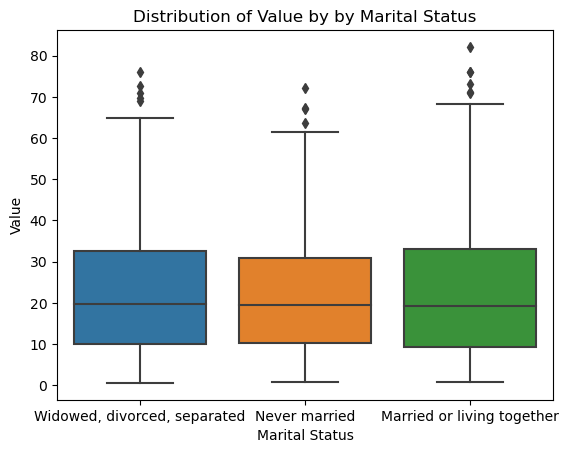

In [95]:
# Bar plot for median Value by marital status
boxplot('Demographics Response', 'Value', df_marital, "Demographics Response")
plt.title('Distribution of Value by by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Value')
plt.show()

[Back to table of contents](#Table-of-contents)

### 5. Outliers inspection

In this section, I want to identify whether there are any trends associated with the outliers present in our dataset as seen before. Below, I define a function that calculates the interquartile range (IQR) and uses it to define outliers as those points that lie outside 1.5 * IQR from the Q1 and Q3. 

In [97]:
# For statistical detection, I define a function to calculate IQR and identify outliers
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold =  Q3 + (1.5 * IQR)
    
    outliers = df[df[feature] > outlier_threshold]
    return outliers

Let's apply the function to the entire dataset, particularly the `Values` column.

In [113]:
outliers_general = detect_outliers(df_africa, 'Value')

I want to view the top outliers:

In [99]:
outliers_general.head(20).sort_values("Value", ascending=False)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
965,363,Chad,Central Africa,2014,F,Employment,Employed for cash,... for at least one specific reason,79.6
947,363,Chad,Central Africa,2014,F,Education,Primary,... for at least one specific reason,79.5
948,363,Chad,Central Africa,2014,F,Education,Secondary,... for at least one specific reason,76.7
1470,367,Congo Democratic Republic,Central Africa,2013,F,Age,15-24,... for at least one specific reason,76.3
931,363,Chad,Central Africa,2014,F,Age,25-34,... for at least one specific reason,76.1
980,363,Chad,Central Africa,2014,F,Marital status,Married or living together,... for at least one specific reason,76.0
1486,367,Congo Democratic Republic,Central Africa,2013,F,Education,No education,... for at least one specific reason,75.4
1471,367,Congo Democratic Republic,Central Africa,2013,F,Age,25-34,... for at least one specific reason,75.2
996,363,Chad,Central Africa,2014,F,Residence,Urban,... for at least one specific reason,73.8
995,363,Chad,Central Africa,2014,F,Residence,Rural,... for at least one specific reason,73.5


I am finding that most of the outliers are records whose reason is "for atleast one specific reason". The general nature of this reason might indeed be contributing to higher agreement percentages and thus more outliers. This broader category could potentially capture a wider range of justifications that participants might agree with, compared to more specific scenarios, leading to higher overall scores. 

Therefore it may be a good idea to isolate the data for “for at least one specific reason” and analyze it separately from the more specific reasons just in case it skews the central tendencies and variability within our data.

In [100]:
# Filter out the general reason
df_specific = df_africa[df_africa['Question'] != '... for at least one specific reason']
df_general = df_africa[df_africa['Question'] == '... for at least one specific reason']

<Axes: xlabel='Gender', ylabel='Value'>

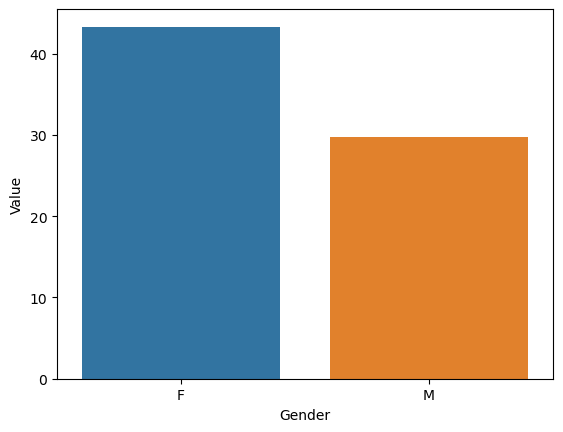

In [101]:
# Compare male and female agreement levels for general reason dataset
data = df_general.groupby("Gender")['Value'].median().sort_values(ascending=False).reset_index()
sns.barplot(x="Gender", y='Value', data=data)

<Axes: xlabel='Gender', ylabel='Value'>

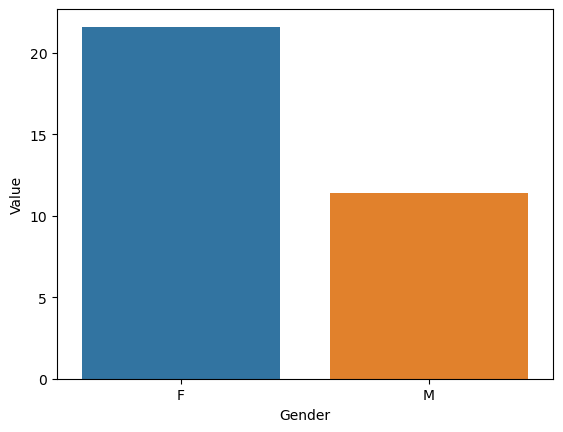

In [102]:
# Compare male and female agreement levels for specific reasons dataset
data1 = df_specific.groupby("Gender")['Value'].median().sort_values(ascending=False).reset_index()
sns.barplot(x="Gender", y='Value', data=data1)

(array([1331., 1373., 1021.,  734.,  408.,  283.,  253.,  104.,   29.,
          14.]),
 array([ 0. ,  7.7, 15.4, 23.1, 30.8, 38.5, 46.2, 53.9, 61.6, 69.3, 77. ]),
 <BarContainer object of 10 artists>)

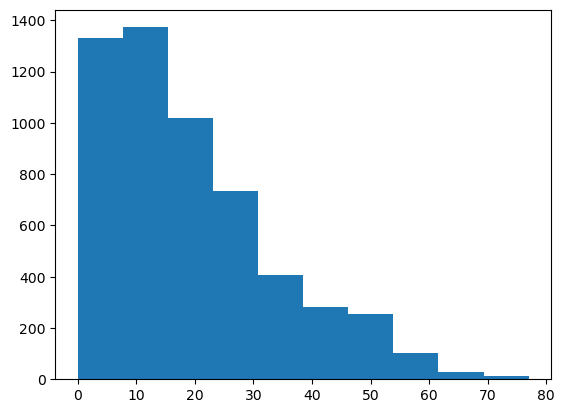

In [103]:
plt.hist(df_specific["Value"])

(array([ 52., 127., 172., 190., 201., 154.,  85.,  76.,  50.,  15.]),
 array([ 1.1,  9.6, 18.1, 26.6, 35.1, 43.6, 52.1, 60.6, 69.1, 77.6, 86.1]),
 <BarContainer object of 10 artists>)

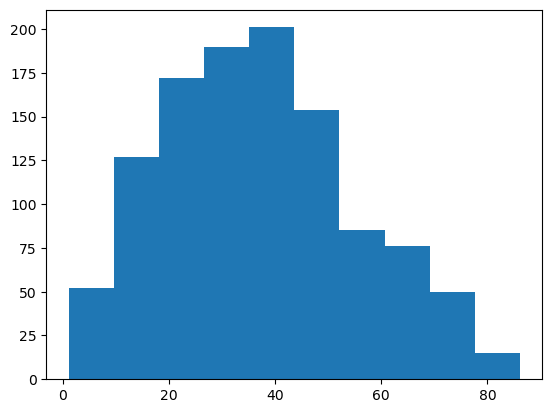

In [104]:
plt.hist(df_general["Value"])

The histogram of agreement percentages for the broad reason “for at least one specific reason” is nearly normally distributed. This could mean that this category is seen as generally understandable to a moderate degree by most of the population, without strong polarizations that are more common with specific reasons.

It also seems removing this category doesn’t significantly alter the patterns observed in the rest of the data. This means that it’s not skewing the data as much as initially thought. It seems to integrate well into the overall distribution, suggesting that the insights drawn from our entire dataset, inclusive of the general reason, are still valid and reflective of broader attitudes.

For information purposes, we will look at the ouliers for both the general reason dataset and the specific reasons dataset.

In [105]:
outliers_specific = detect_outliers(df_specific, 'Value')

In [106]:
outliers_specific.sort_values("Value", ascending=False).head(20)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
4372,184,Morocco,North Africa,2003,F,Employment,Employed for kind,... if she goes out without telling him,77.0
4366,114,Morocco,North Africa,2003,F,Employment,Employed for kind,... if she argues with him,76.5
4375,254,Morocco,North Africa,2003,F,Employment,Employed for kind,... if she neglects the children,75.6
4404,184,Morocco,North Africa,2003,F,Residence,Rural,... if she goes out without telling him,72.4
4163,112,Mali,West Africa,2018,F,Education,No education,... if she argues with him,71.0
4203,112,Mali,West Africa,2018,F,Marital status,Married or living together,... if she argues with him,71.0
4144,112,Mali,West Africa,2018,F,Age,25-34,... if she argues with him,70.8
4220,112,Mali,West Africa,2018,F,Residence,Rural,... if she argues with him,70.6
4400,114,Morocco,North Africa,2003,F,Residence,Rural,... if she argues with him,70.5
4186,112,Mali,West Africa,2018,F,Employment,Employed for kind,... if she argues with him,70.5


North and West Africa , Morocco and Mali, Female, if she argues with him

In [107]:
outliers_genreason = detect_outliers(df_general, 'Value')

In [108]:
outliers_genreason.sort_values("Value", ascending=False).head(50)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value


Note that, if we feed the dataframe with the general reason alone, the distribution is different and not skewed like the the specific reasons one, hence no outliers are detected.
Instead, we can filter the outliers for the entire dataset to be left only with those related with the general reason.

In [109]:
outliers_general[outliers_general['Question'] == '... for at least one specific reason'].head(20)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
622,360,Burundi,East Africa,2016,F,Marital status,"Widowed, divorced, separated",... for at least one specific reason,69.1
930,363,Chad,Central Africa,2014,F,Age,15-24,... for at least one specific reason,72.2
931,363,Chad,Central Africa,2014,F,Age,25-34,... for at least one specific reason,76.1
932,363,Chad,Central Africa,2014,F,Age,35-49,... for at least one specific reason,72.5
946,363,Chad,Central Africa,2014,F,Education,No education,... for at least one specific reason,70.9
947,363,Chad,Central Africa,2014,F,Education,Primary,... for at least one specific reason,79.5
948,363,Chad,Central Africa,2014,F,Education,Secondary,... for at least one specific reason,76.7
965,363,Chad,Central Africa,2014,F,Employment,Employed for cash,... for at least one specific reason,79.6
966,363,Chad,Central Africa,2014,F,Employment,Employed for kind,... for at least one specific reason,70.7
967,363,Chad,Central Africa,2014,F,Employment,Unemployed,... for at least one specific reason,70.0


Central Africa, Chad and Congo, Females

Since the outliers we have observed so far are for female respondents, let's also look at the top outliers related to male respondents and the patterns exposed:

In [110]:
outliers_male = detect_outliers(df_africa[df_africa["Gender"]=="M"], 'Value').sort_values("Value", ascending=False)
outliers_male.head(20)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
1582,367,Congo Democratic Republic,Central Africa,2013,M,Employment,Unemployed,... for at least one specific reason,67.8
1545,367,Congo Democratic Republic,Central Africa,2013,M,Age,15-24,... for at least one specific reason,67.6
1596,367,Congo Democratic Republic,Central Africa,2013,M,Marital status,Never married,... for at least one specific reason,67.0
1562,367,Congo Democratic Republic,Central Africa,2013,M,Education,Primary,... for at least one specific reason,64.9
3181,378,Guinea,West Africa,2018,M,Education,No education,... for at least one specific reason,64.5
1561,367,Congo Democratic Republic,Central Africa,2013,M,Education,No education,... for at least one specific reason,63.9
1563,367,Congo Democratic Republic,Central Africa,2013,M,Education,Secondary,... for at least one specific reason,62.1
1610,367,Congo Democratic Republic,Central Africa,2013,M,Residence,Rural,... for at least one specific reason,61.4
1546,367,Congo Democratic Republic,Central Africa,2013,M,Age,25-34,... for at least one specific reason,60.8
3349,385,Kenya,East Africa,2014,M,Education,No education,... for at least one specific reason,60.4


Central and West Africa, Congo and Guinea, for atleast one specific reason

What male outliers are not linked to the general reason?

In [111]:
outliers_male[outliers_male['Question'] != '... for at least one specific reason']

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
3365,245,Kenya,East Africa,2014,M,Education,No education,... if she neglects the children,51.1
3226,238,Guinea,West Africa,2018,M,Marital status,"Widowed, divorced, separated",... if she neglects the children,50.9
3193,238,Guinea,West Africa,2018,M,Education,No education,... if she neglects the children,50.2
3361,175,Kenya,East Africa,2014,M,Education,No education,... if she goes out without telling him,48.2
3236,238,Guinea,West Africa,2018,M,Residence,Rural,... if she neglects the children,47.7


It seems male respondents in Kenya and Guinea, mostly non-educated, agree highly to GBV in response to a woman neglecting children.

In [112]:
outliers_female = detect_outliers(df_africa[df_africa["Gender"]=="F"], 'Value').sort_values("Value", ascending=False)
outliers_female.head(20)

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value
4363,394,Morocco,North Africa,2003,F,Employment,Employed for kind,... for at least one specific reason,86.1


When we try to find outliers amongst the female respondents, only one is found indicating that female views on GBV are less polarised that men's.

[Back to table of contents](#Table-of-contents)

### 6. Statistical analysis

In this section, I conduct statistical tests to determine whether the observed differences in agreement with GBV justification across various demographic groups are statistically significant or could have occurred by chance.

We also calculate effect sizes to understand the strength of these differences, beyond just statistical significance.

This will help validate the visual trends we observed earlier.

#### Hypotheses

For each demographic variable, we define:

- **Null Hypothesis (H0):** There is no significant difference in the median percentage agreement between the groups of the demographic variable.
- **Alternative Hypothesis (H1):** There is a significant difference in the median percentage agreement between at least two groups.

We will test these hypotheses for different demographic variables like Gender, Region etc.

#### Statistical Tests

Since the target variable `Value` is not normally distributed as seen before, I choose non-parametric tests:

- **Mann-Whitney U Test** for variables with **2 categories** (e.g., Gender, Residence Type).
- **Kruskal-Wallis H Test** for variables with **more than 2 categories** (e.g., Region, Marital Status).

These tests do not assume normality and are appropriate for our case.

#### Create Functions

I create two functions:

1. **mann_whitney_test()**: 
   - Performs the Mann-Whitney U Test for variables with two categories.
   - Returns the test statistic, p-value, statistical significance (based on p < 0.05), and effect size (rank biserial correlation).

2. **kruskal_wallis_test()**:
   - Performs the Kruskal-Wallis H Test for variables with more than two categories.
   - Returns the test statistic, p-value, statistical significance (based on p < 0.05), and effect size (Eta squared, η²).

These functions make statistical analysis reusable and consistent across the dataset.

In [136]:
def mann_whitney_test(data, group_col, target_col, alpha=0.05):
    """
    Mann-Whitney U Test for two independent groups.

    Returns test statistic, p-value, statistical significance, effect size and interpretation.
    """
    categories = data[group_col].dropna().unique()
    if len(categories) != 2:
        raise ValueError("The grouping variable must have exactly 2 unique categories.")
    
    group1 = data[data[group_col] == categories[0]][target_col].dropna()
    group2 = data[data[group_col] == categories[1]][target_col].dropna()
    
    # Calculating statistical significance
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    
    # Calculating effect size
    n1, n2 = len(group1), len(group2)
    U = stat
    rank_biserial = 1 - (2 * U) / (n1 * n2)

    significance = 'Statistically Significant' if p < alpha else 'Not Statistically Significant'

    return {
        'Groups': [categories[0],categories[1]],
        'U-statistic': round(stat, 3),
        'p-value': p,
        'Significance': significance,
        'Effect size (Rank Biserial)': round(rank_biserial, 3),
        'Effect size interpretation': (
            "Small effect" if abs(rank_biserial) < 0.1 else
            "Medium effect" if abs(rank_biserial) < 0.3 else
            "Large effect"
        )
    }

In [131]:
def kruskal_wallis_test(data, group_col, target_col, alpha=0.05):
    """
    Kruskal-Wallis H Test for more than two independent groups.

    Returns test statistic, p-value, statistical significance, effect size and interpretation.
    """
    categories = data[group_col].dropna().unique()
    if len(categories) <= 2:
        raise ValueError("The grouping variable must have more than 2 unique categories.")

    group_values = [data[data[group_col] == cat][target_col].dropna() for cat in categories]
    
    # Calculating statistical significance
    stat, p = kruskal(*group_values)
    
    # Calculating effect size
    N = data[target_col].shape[0]
    k = len(categories)
    eta_sq = (stat - (k - 1)) / (N - (k - 1))

    significance = 'Statistically Significant' if p < alpha else 'Not Statistically Significant'

    return {
        'Groups': list(categories),
        'H-statistic': round(stat, 3),
        'p-value': round(p, 3),
        'Significance': significance,
        'Effect size (η²)': round(eta_sq, 3),
        'Effect size interpretation': (
            "Negligible effect" if eta_sq < 0.01 else
            "Small effect" if eta_sq < 0.06 else
            "Medium effect" if eta_sq < 0.14 else
            "Large effect"
        )
    }

In [137]:
mann_whitney_test(df_africa, 'Gender', 'Value', alpha=0.05)

{'Groups': ['F', 'M'],
 'U-statistic': 7520060.5,
 'p-value': 7.938163858634735e-138,
 'Significance': 'Statistically Significant',
 'Effect size (Rank Biserial)': -0.354,
 'Effect size interpretation': 'Large effect'}

In [133]:
kruskal_wallis_test(df_africa, 'Region', 'Value', alpha=0.05)

{'Groups': ['Central Africa',
  'West Africa',
  'East Africa',
  'North Africa',
  'Southern Africa'],
 'H-statistic': 727.691,
 'p-value': 0.0,
 'Significance': 'Statistically Significant',
 'Effect size (η²)': 0.103,
 'Effect size interpretation': 'Medium effect'}

In [138]:
kruskal_wallis_test(df_age, 'Demographics Response', 'Value', alpha=0.05)

{'Groups': ['25-34', '15-24', '35-49'],
 'H-statistic': 13.651,
 'p-value': 0.001,
 'Significance': 'Statistically Significant',
 'Effect size (η²)': 0.008,
 'Effect size interpretation': 'Negligible effect'}

In [139]:
kruskal_wallis_test(df_education, 'Demographics Response', 'Value', alpha=0.05)

{'Groups': ['Higher', 'Secondary', 'Primary', 'No education'],
 'H-statistic': 484.376,
 'p-value': 0.0,
 'Significance': 'Statistically Significant',
 'Effect size (η²)': 0.258,
 'Effect size interpretation': 'Large effect'}

In [143]:
mann_whitney_test(df_residence, 'Demographics Response', 'Value', alpha=0.05)

{'Groups': ['Urban', 'Rural'],
 'U-statistic': 67312.5,
 'p-value': 6.543563649080333e-17,
 'Significance': 'Statistically Significant',
 'Effect size (Rank Biserial)': 0.323,
 'Effect size interpretation': 'Large effect'}

In [141]:
kruskal_wallis_test(df_employment, 'Demographics Response', 'Value', alpha=0.05)

{'Groups': ['Unemployed', 'Employed for cash', 'Employed for kind'],
 'H-statistic': 34.465,
 'p-value': 0.0,
 'Significance': 'Statistically Significant',
 'Effect size (η²)': 0.023,
 'Effect size interpretation': 'Small effect'}

In [142]:
kruskal_wallis_test(df_marital, 'Demographics Response', 'Value', alpha=0.05)

{'Groups': ['Never married',
  'Married or living together',
  'Widowed, divorced, separated'],
 'H-statistic': 0.512,
 'p-value': 0.774,
 'Significance': 'Not Statistically Significant',
 'Effect size (η²)': -0.001,
 'Effect size interpretation': 'Negligible effect'}

In [147]:
print(df_africa[df_africa["Gender"]=='F']["Value"].median())
print(df_africa[df_africa["Gender"]=='M']["Value"].median())
print(df_africa[df_africa["Gender"]=='F']["Value"].mean())
print(df_africa[df_africa["Gender"]=='M']["Value"].mean())

24.6
13.6
27.59204152249135
16.671161048689136


/var/folders/lz/3f37bdyx60j704hr677r17mw0000gn/T/ipykernel_71333/1574478832.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_africa[df_africa["Gender"]=='F']["Value"], label='Female', shade=True)
/Users/nyathirambugua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/lz/3f37bdyx60j704hr677r17mw0000gn/T/ipykernel_71333/1574478832.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_africa[df_africa["Gender"]=='M']["Value"], label='Male', shade=True)
/Users/nyathirambugua/anaconda3/lib/python3.11/site-packages/seabo

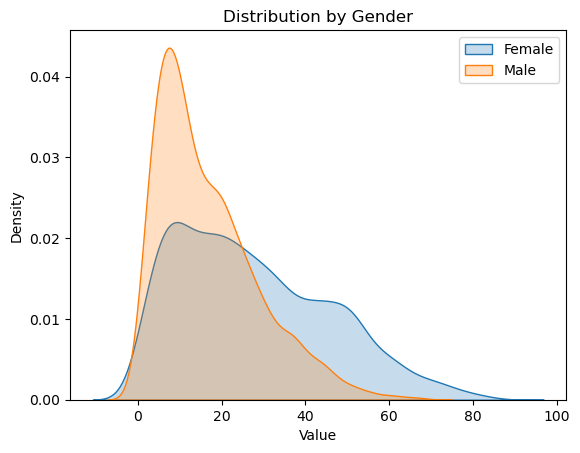

In [148]:
sns.kdeplot(df_africa[df_africa["Gender"]=='F']["Value"], label='Female', shade=True)
sns.kdeplot(df_africa[df_africa["Gender"]=='M']["Value"], label='Male', shade=True)
plt.legend()
plt.title('Distribution by Gender')
plt.show()

In [154]:
from scipy.stats import rankdata

mask = df_africa[df_africa['Value'].notna()]
mask['ranks'] = rankdata(mask['Value'])
mask.groupby('Gender')['ranks'].mean()

/var/folders/lz/3f37bdyx60j704hr677r17mw0000gn/T/ipykernel_71333/414901434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['ranks'] = rankdata(mask['Value'])


Gender
F    3902.914216
M    2723.414950
Name: ranks, dtype: float64

In [155]:
mask.head()

,RecordID,Country,Region,Year,Gender,Demographics Question,Demographics Response,Question,Value,ranks
0,3,Angola,Central Africa,2015,F,Education,Higher,... if she burns the food,0.9,61.0
1,3,Angola,Central Africa,2015,F,Education,Secondary,... if she burns the food,5.3,788.5
2,3,Angola,Central Africa,2015,F,Residence,Urban,... if she burns the food,6.9,1182.5
3,3,Angola,Central Africa,2015,F,Employment,Unemployed,... if she burns the food,8.8,1637.5
4,3,Angola,Central Africa,2015,F,Marital status,Never married,... if she burns the food,9.8,1850.0
